<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003-24BAD122-ML/blob/main/Ex_4(2)_24BAD122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCENARIO 2 – GAUSSIAN NAÏVE BAYES
Problem Statement
Classify flower species based on physical measurements.
Dataset (Public / Standard Dataset)
Iris Dataset (sklearn)
Target Variable: Flower Species
Input Features
• Sepal Length
• Sepal Width
• Petal Length
• Petal Width
IN-LAB TASKS (Gaussian Naïve Bayes)
1. Import required Python libraries.
2. Load the Iris dataset.
3. Perform data inspection & preprocessing.
4. Apply feature scaling.
5. Split dataset into training and testing sets.
6. Train a Gaussian Naïve Bayes classifier.
7. Predict species labels.
8. Evaluate performance using:
• Accuracy
• Precision / Recall / F1 Score
9. Compare predictions with actual labels.
10. Analyze class probabilities.
11. Compare Gaussian NB with Logistic Regression (optional).
Visualization
• Decision Boundary Plot (using two features)
• Confusion Matrix
• Probability distribution plots

Name: Swathi
Roll No: 24BAD122
Gaussian Naive Bayes – Iris Classification

First 5 Rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None

Missing Values:
sep

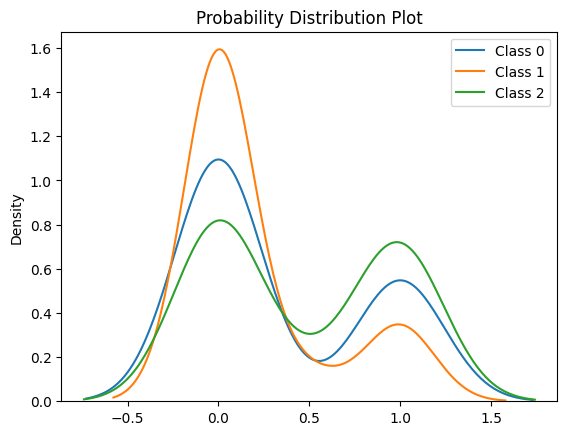


Logistic Regression Accuracy: 0.9


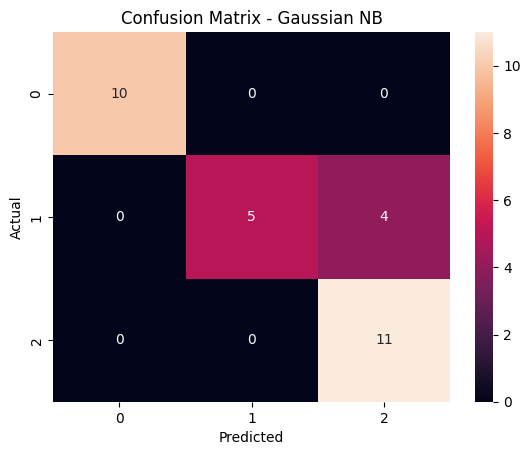

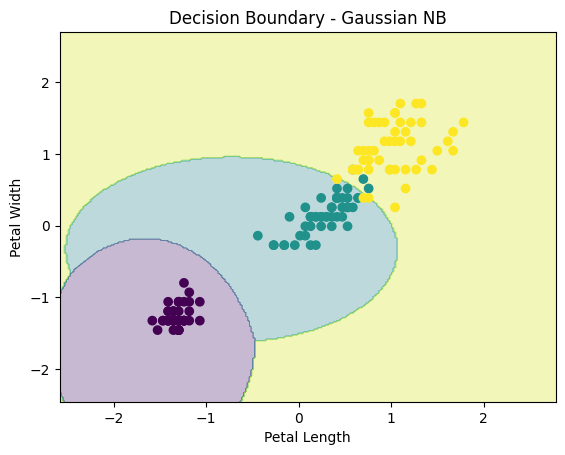


Program Completed Successfully
Name: Swathi | Roll No: 24BAD122


In [ ]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Name: Swathi")
print("Roll No: 24BAD122")
print("Gaussian Naive Bayes – Iris Classification")

# 2. Load Iris dataset (CSV file)
df = pd.read_csv("iris.data.csv")

# Assign column names (if dataset has no header)
df.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]

print("\nFirst 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# 3. Preprocessing
# Encode categorical target variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Features and target
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Train Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 7. Predictions
y_pred = gnb.predict(X_test)

# 8. Evaluation Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Compare Predictions with Actual Labels
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print("\nActual vs Predicted:")
print(comparison.head(10))

# 10. Class Probabilities
probabilities = gnb.predict_proba(X_test)

print("\nClass Probabilities (First 5 rows):")
print(probabilities[:5])

# Probability distribution plot
plt.figure()
for i in range(probabilities.shape[1]):
    sns.kdeplot(probabilities[:, i], label="Class " + str(i))
plt.title("Probability Distribution Plot")
plt.legend()
plt.show()

# 11. Logistic Regression Comparison (Optional)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Boundary using two features
# (petal_length & petal_width)
X2 = df[['petal_length','petal_width']]
X2 = StandardScaler().fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model = GaussianNB()
model.fit(X2_train, y2_train)

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary - Gaussian NB")
plt.show()

print("\nProgram Completed Successfully")
print("Name: Swathi | Roll No: 24BAD122")



Import Libraries: It starts by importing necessary libraries for numerical operations (numpy), data manipulation (pandas), plotting (matplotlib.pyplot, seaborn), and various machine learning functionalities from sklearn (data splitting, preprocessing, models like GaussianNB and LogisticRegression, and evaluation metrics).

Load Iris Dataset: The code loads the Iris dataset from a CSV file named 'iris.data.csv' into a pandas DataFrame. It then assigns appropriate column names: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'.

Data Inspection: It prints the first 5 rows (df.head()), general information about the DataFrame including data types and non-null counts (df.info()), and checks for any missing values (df.isnull().sum()).

Preprocessing: The categorical 'species' column (e.g., 'Iris-setosa') is converted into numerical labels (0, 1, 2) using LabelEncoder. Then, the dataset is split into features (X) consisting of sepal and petal measurements, and the target variable (y) which is the encoded species.

Feature Scaling: StandardScaler is used to standardize the feature columns (X). This transforms the data so that it has a mean of 0 and a standard deviation of 1, which can be beneficial for many machine learning algorithms.

Train-Test Split: The data is divided into training and testing sets using train_test_split. 80% of the data is used for training the model, and 20% is reserved for testing its performance, ensuring the model is evaluated on unseen data.

Train Gaussian Naïve Bayes Model: A GaussianNB classifier is initialized and then trained (fit) on the scaled training features (X_train) and their corresponding target labels (y_train).

Predictions: The trained GaussianNB model makes predictions (predict) on the scaled test features (X_test), generating y_pred.

Evaluation Metrics: The performance of the Gaussian Naïve Bayes model is evaluated using:

Accuracy Score: The proportion of correctly classified instances.
Classification Report: Provides precision, recall, f1-score, and support for each class.
Compare Predictions with Actual Labels: A pandas DataFrame is created to show a side-by-side comparison of the actual species labels (y_test) and the model's predicted labels (y_pred) for the test set.

Class Probabilities: The model calculates the probability of each test sample belonging to each class using predict_proba. A Kernel Density Estimate (KDE) plot visualizes these probability distributions for each class.

Logistic Regression Comparison (Optional): A LogisticRegression model is also trained and evaluated on the same data for comparison purposes, demonstrating its accuracy.

Confusion Matrix Visualization: A heatmap is generated to visualize the confusion matrix for the Gaussian Naïve Bayes model. This matrix shows the counts of true positive, true negative, false positive, and false negative predictions.

Decision Boundary Plot: This section visualizes the decision boundary of the Gaussian Naïve Bayes classifier using only two features (petal length and petal width). It creates a grid of points, predicts the class for each point, and then plots the decision regions along with the original data points.